In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

In [3]:
df = pd.read_csv(r"E:\DataAnalysis\Data\survey_results_public.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
list(df.columns)


['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [5]:
#Which organization sizes pay developers the most?
# Select the two needed columns
salary_df = df[["OrgSize", "ConvertedCompYearly"]].copy()

# Drop missing values to avoid errors
salary_df = salary_df.dropna()

# Group by organization size and calculate the median salary
salary_by_org = (
    salary_df
    .groupby("OrgSize")["ConvertedCompYearly"]
    .median()
    .sort_values(ascending=False)
)

# Display the ranking
salary_by_org


OrgSize
10,000 or more employees                              92000.0
5,000 to 9,999 employees                              79981.0
1,000 to 4,999 employees                              73036.0
500 to 999 employees                                  71962.0
100 to 499 employees                                  66592.0
Just me - I am a freelancer, sole proprietor, etc.    64444.0
20 to 99 employees                                    60000.0
I don’t know                                          53703.0
10 to 19 employees                                    51555.0
2 to 9 employees                                      47854.0
Name: ConvertedCompYearly, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_9556\854932566.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


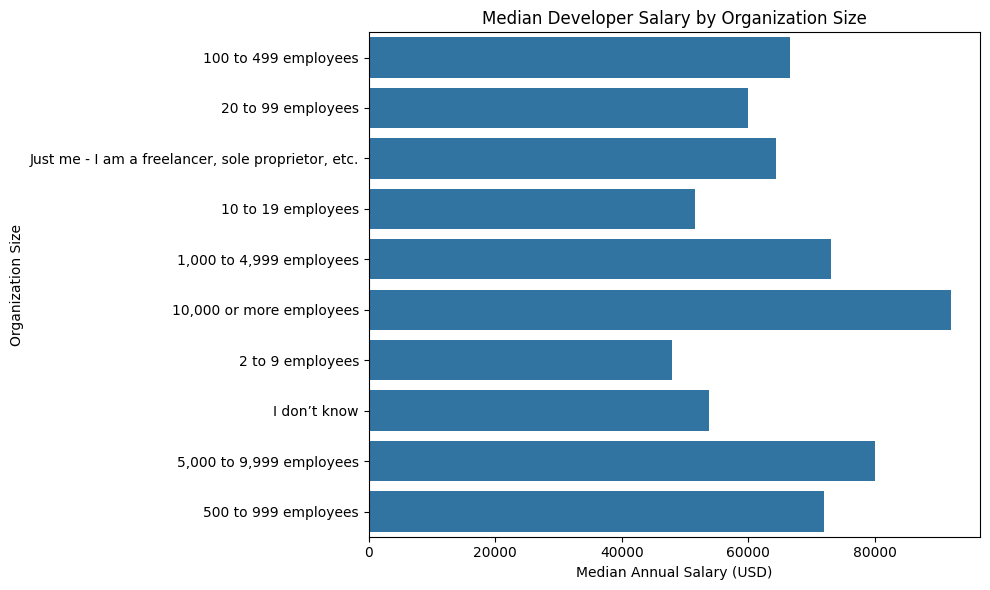

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=salary_df,
    x="ConvertedCompYearly",
    y="OrgSize",
    estimator=np.median,
    ci=None
)
plt.title("Median Developer Salary by Organization Size")
plt.xlabel("Median Annual Salary (USD)")
plt.ylabel("Organization Size")
plt.tight_layout()
plt.show()



In [7]:
# Count how many people fall into each remote work category
# dropna=False keeps NaN values so you can see missing responses too
df["RemoteWork"].value_counts(dropna=False)

# Keep only the columns needed for this analysis:
# RemoteWork  -> how often they work remotely
# JobSat      -> job satisfaction score
remote_df = df[['RemoteWork', 'JobSat']].dropna()

# Calculate the average job satisfaction for each remote work category
# sort_values(ascending=False) shows the highest satisfaction first
remote_df.groupby('RemoteWork')['JobSat'].mean().sort_values(ascending=False)


RemoteWork
Remote                                  7.072593
Hybrid (some remote, some in-person)    6.944304
In-person                               6.628153
Name: JobSat, dtype: float64

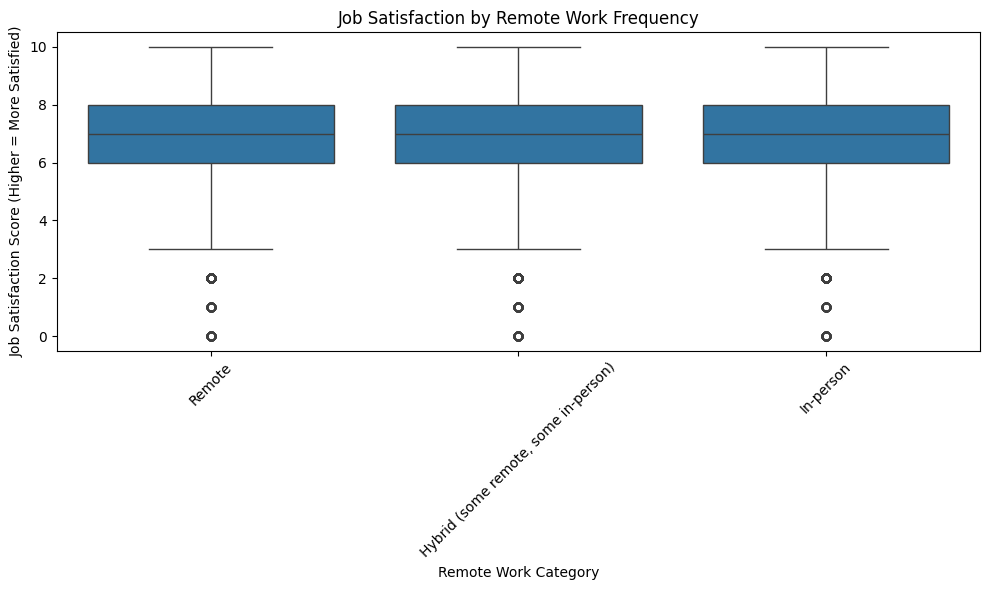

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a filtered dataframe (already done earlier)
remote_df = df[['RemoteWork', 'JobSat']].dropna()

# Set plot size
plt.figure(figsize=(10, 6))

# Create a boxplot to compare job satisfaction across remote work categories
sns.boxplot(
    data=remote_df,
    x='RemoteWork',
    y='JobSat'
)

# Add title and axis labels
plt.title("Job Satisfaction by Remote Work Frequency")
plt.xlabel("Remote Work Category")
plt.ylabel("Job Satisfaction Score (Higher = More Satisfied)")

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9556\1398052748.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_df.groupby("ExpBucket")["ConvertedCompYearly"]
C:\Users\hp\AppData\Local\Temp\ipykernel_9556\1398052748.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


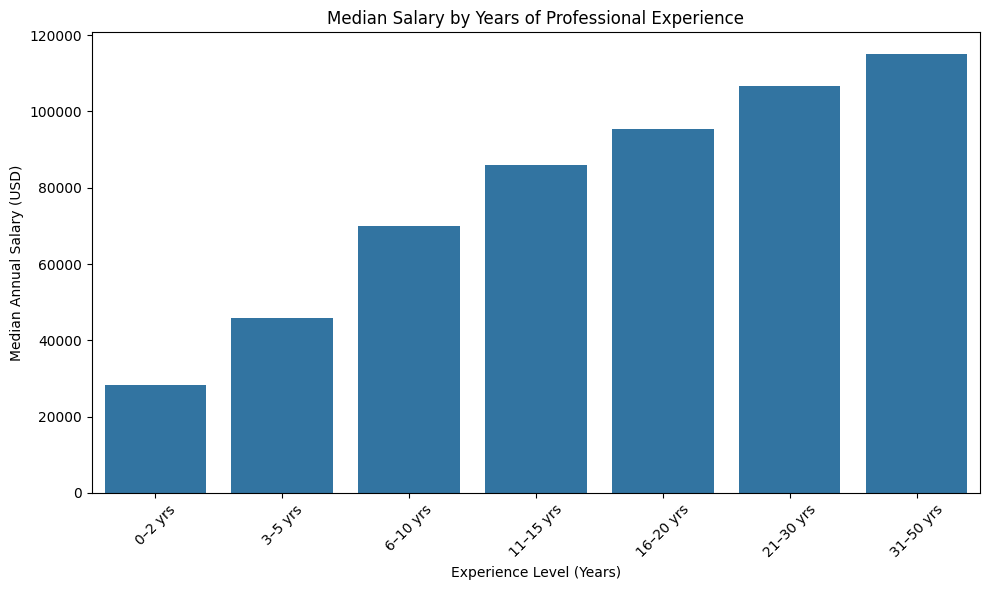

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Clean the YearsCodePro column ---
df["YearsCodePro"] = (
    df["YearsCodePro"]
    .replace("Less than 1 year", 0)
    .replace("More than 50 years", 50)
    .astype(float)
)

# --- Filter useful columns ---
exp_df = df[["YearsCodePro", "ConvertedCompYearly"]].dropna()

# --- Create experience buckets (to make the bar chart readable) ---
exp_df["ExpBucket"] = pd.cut(
    exp_df["YearsCodePro"],
    bins=[0, 2, 5, 10, 15, 20, 30, 50],
    labels=[
        "0–2 yrs", 
        "3–5 yrs", 
        "6–10 yrs", 
        "11–15 yrs", 
        "16–20 yrs", 
        "21–30 yrs", 
        "31–50 yrs"
    ]
)

# --- Group by bucket and calculate median salary ---
median_salary = (
    exp_df.groupby("ExpBucket")["ConvertedCompYearly"]
    .median()
    .reset_index()
)

# --- Bar chart ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=median_salary,
    x="ExpBucket", 
    y="ConvertedCompYearly",
    ci=None
)

plt.title("Median Salary by Years of Professional Experience")
plt.xlabel("Experience Level (Years)")
plt.ylabel("Median Annual Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
#“What is the most popular method of learning to code?”
# Convert multi-select field into dummy columns (1/0)
learn_df = df['LearnCode'].str.get_dummies(sep=';')

# Sum across all rows to get total count for each learning method
learn_counts = learn_df.sum().sort_values(ascending=False)

learn_counts


Other online resources (e.g., videos, blogs, forum, online community)    49654
Books / Physical media                                                   30392
Online Courses or Certification                                          30271
School (i.e., University, College, etc)                                  29722
On the job training                                                      27244
Colleague                                                                14258
Coding Bootcamp                                                           6503
Friend or family member                                                   6378
Other (please specify):                                                   3635
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_9556\3917242113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


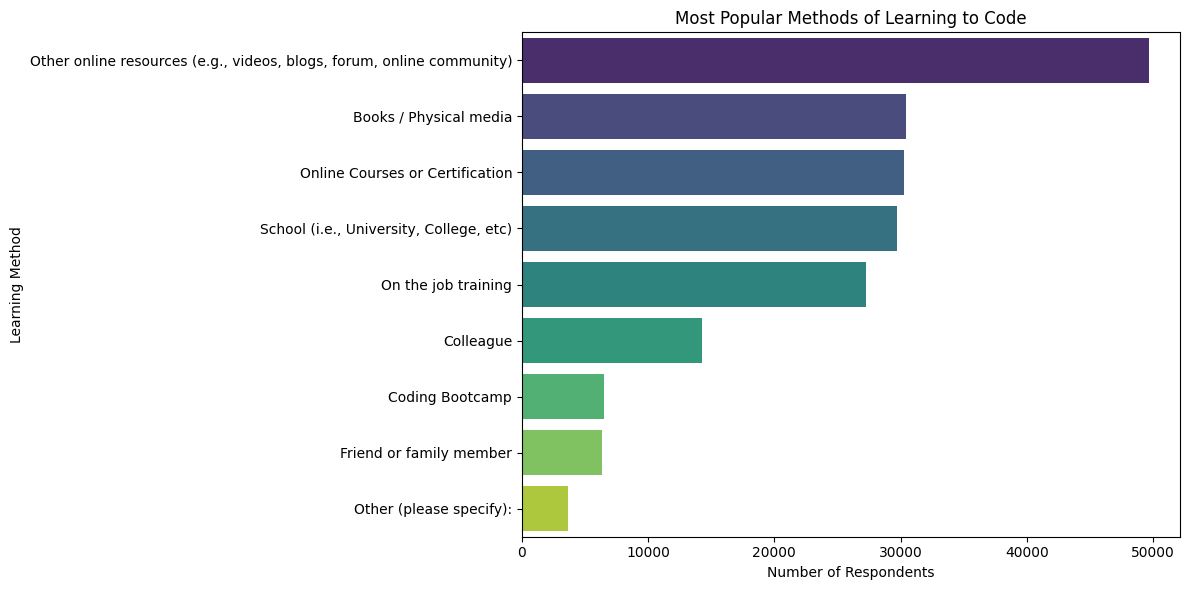

In [11]:
#Visualize with a bar chart
plt.figure(figsize=(12,6))

# Bar chart of learning method frequency
sns.barplot(
    x=learn_counts.values,
    y=learn_counts.index,
    palette="viridis"
)

# Add title & labels
plt.title("Most Popular Methods of Learning to Code")
plt.xlabel("Number of Respondents")
plt.ylabel("Learning Method")
plt.tight_layout()
plt.show()



In [12]:
#Are you more likely to get a job as a developer if you have a master’s degree?

Percentage of people working as developers:
HasMasters
False    59.007618
True     66.490969
Name: IsDeveloper, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_9556\3601472447.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


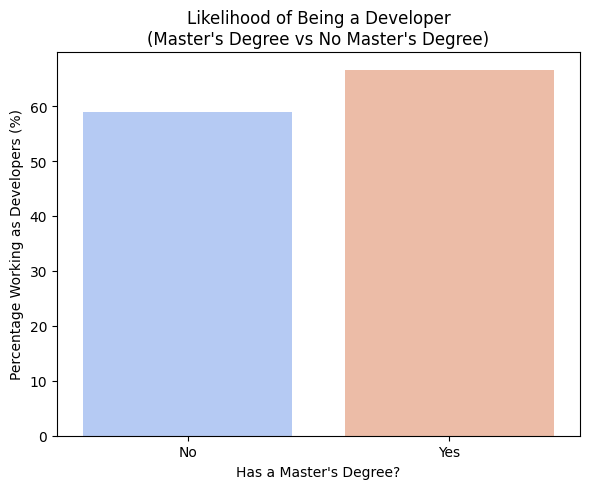

In [13]:
# ----------------------------------------
# 1. Create a column for Master's degree
# ----------------------------------------

# HasMasters = True if the respondent's education level mentions "Master"
df["HasMasters"] = df["EdLevel"].str.contains("Master", na=False)


# ----------------------------------------
# 2. Create a column that identifies developers
# ----------------------------------------

# DevType contains job titles such as:
# "Developer, full-stack", "Developer, back-end", etc.
# So this detects if the person works as any kind of developer.
df["IsDeveloper"] = df["DevType"].str.contains("Developer", na=False)


# ----------------------------------------
# 3. Calculate hiring likelihood
# ----------------------------------------

# This shows the percentage of Master's vs Non-Master's
# who are employed as developers.
hiring_rate = df.groupby("HasMasters")["IsDeveloper"].mean() * 100

print("Percentage of people working as developers:")
print(hiring_rate)


# ----------------------------------------
# 4. Visualize results in a bar chart
# ----------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for plotting
plot_df = hiring_rate.reset_index()
plot_df.columns = ["HasMasters", "PercentDeveloper"]

plt.figure(figsize=(6,5))

sns.barplot(
    data=plot_df,
    x="HasMasters",
    y="PercentDeveloper",
    palette="coolwarm"
)

plt.title("Likelihood of Being a Developer\n(Master's Degree vs No Master's Degree)")
plt.xlabel("Has a Master's Degree?")
plt.ylabel("Percentage Working as Developers (%)")

# Change axis labels from True/False to Yes/No
plt.xticks([0,1], ["No", "Yes"])

plt.tight_layout()
plt.show()


In [15]:
#Top 10 Programming Languages Developers Use
lang_df = df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
lang_counts = lang_df.sum().sort_values(ascending=False).head(10)
lang_counts


JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_9556\2769901062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="viridis")


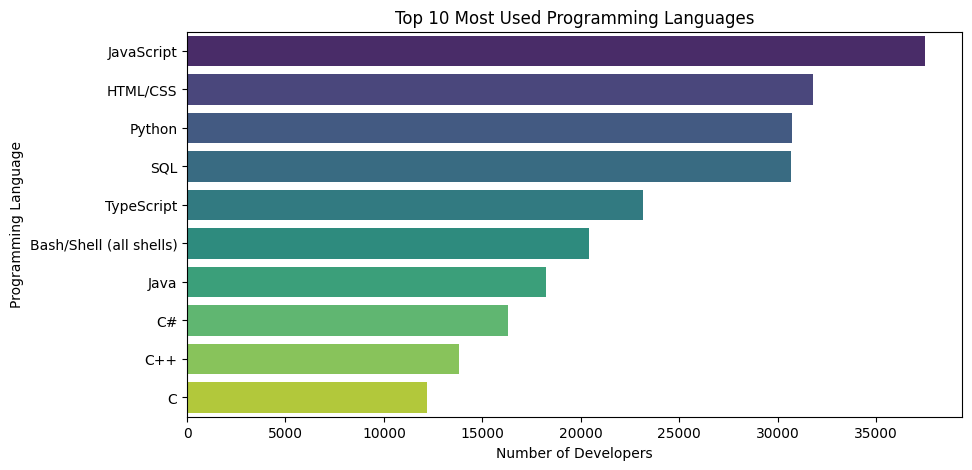

In [16]:
#Top 10 Programming Languages Developers Use Barplot
plt.figure(figsize=(10,5))
sns.barplot(x=lang_counts.values, y=lang_counts.index, palette="viridis")
plt.title("Top 10 Most Used Programming Languages")
plt.xlabel("Number of Developers")
plt.ylabel("Programming Language")
plt.show()


In [20]:
#Top 10 Countries with Highest Developer Salaries
country_salary = (
    df.groupby("Country")["ConvertedCompYearly"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)
country_salary



Country
Gabon                       2000000.0
United States of America     143000.0
Antigua and Barbuda          126120.0
Andorra                      123517.0
Israel                       113334.0
Switzerland                  111417.0
Singapore                    103482.0
Luxembourg                    96288.0
Australia                     95465.5
Ireland                       91295.0
Name: ConvertedCompYearly, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_9556\3735950304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_salary.values, y=country_salary.index, palette="magma")


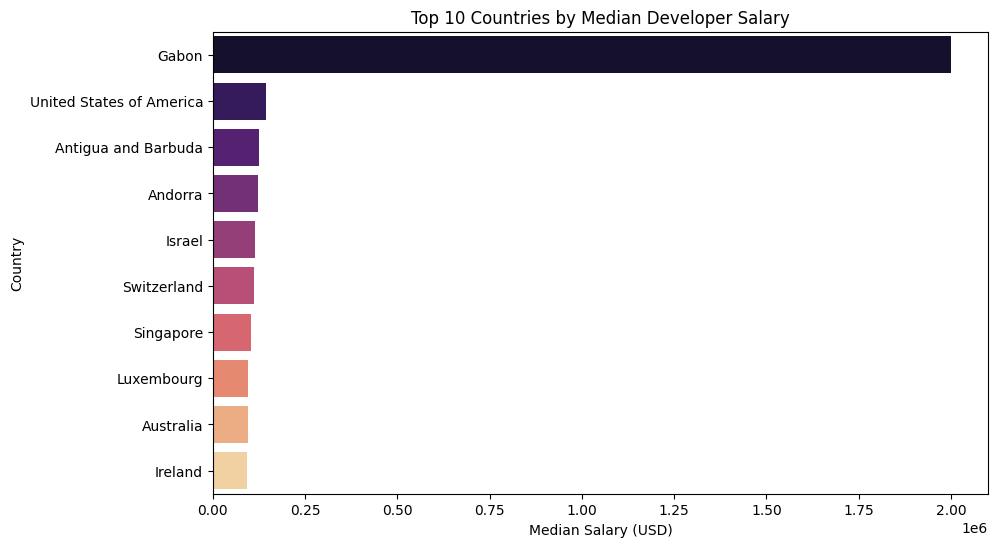

In [19]:
#Top 10 Countries with Highest Developer Salaries Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=country_salary.values, y=country_salary.index, palette="magma")
plt.title("Top 10 Countries by Median Developer Salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Country")
plt.show()

In [22]:
#Most Admired Programming Languages
adm_df = df['LanguageAdmired'].str.get_dummies(sep=';')
adm_counts = adm_df.sum().sort_values(ascending=False).head(10)
adm_counts


JavaScript                 21869
Python                     20774
SQL                        20692
HTML/CSS                   19851
TypeScript                 16079
Bash/Shell (all shells)    12776
C#                         10458
Java                        8687
C++                         7339
Rust                        6215
dtype: int64

In [24]:
#Which Dev Roles Earn the Most?
devrole_salary = (
    df.groupby("DevType")["ConvertedCompYearly"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)
devrole_salary


DevType
Senior Executive (C-Suite, VP, etc.)    127388.0
Developer Advocate                      124203.0
Engineering manager                     115999.0
Developer Experience                    112097.0
Engineer, site reliability               99099.0
Cloud infrastructure engineer            96666.0
Blockchain                               85925.0
Other (please specify):                  80555.0
Product manager                          80000.0
Security professional                    78995.0
Name: ConvertedCompYearly, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_9556\2526247935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=devrole_salary.values, y=devrole_salary.index, palette="rocket")


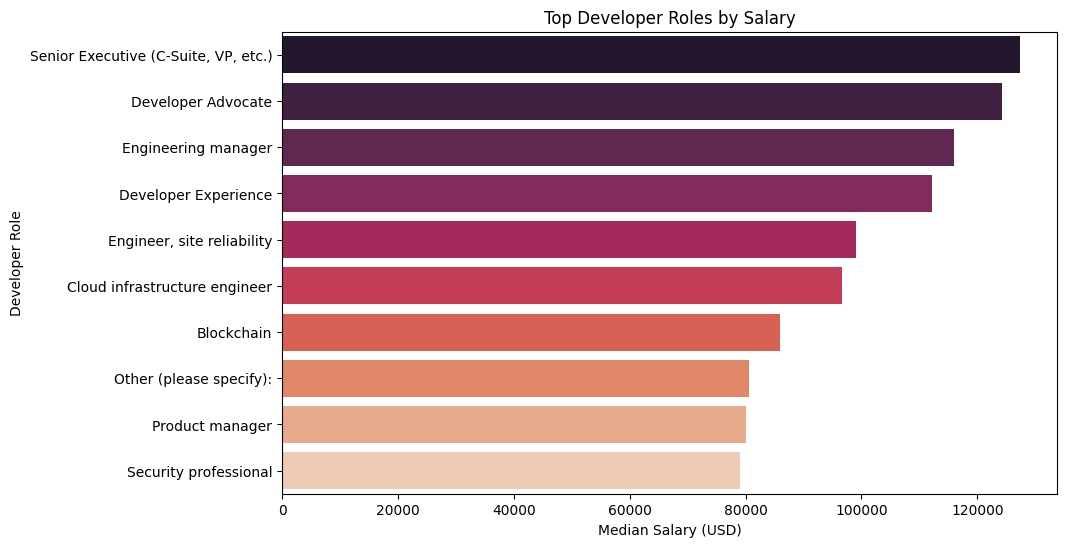

In [25]:
#Which Dev Roles Earn the Most?
plt.figure(figsize=(10,6))
sns.barplot(x=devrole_salary.values, y=devrole_salary.index, palette="rocket")
plt.title("Top Developer Roles by Salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Developer Role")
plt.show()


In [27]:
# Clean YearsCodePro into numeric format
df["YearsCodeProClean"] = (
    df["YearsCodePro"]
    .replace("Less than 1 year", 0)
    .replace("More than 50 years", 50)
    .astype(float)
)


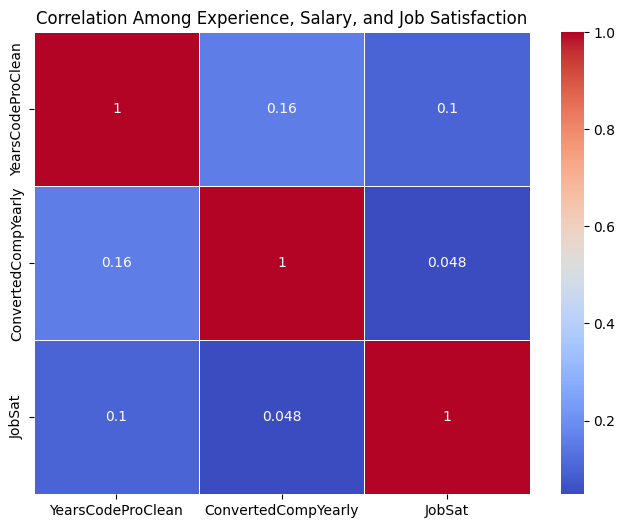

In [28]:
#Correlation Heatmap (Pro-Looking) Columns: experience, salary, job satisfaction
# Keep only numeric features of interest
heat_df = df[["YearsCodeProClean", "ConvertedCompYearly", "JobSat"]].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(heat_df.corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Among Experience, Salary, and Job Satisfaction")
plt.show()


In [29]:
#Which Remote Work Category Earns the Most?
remote_salary = df.groupby("RemoteWork")["ConvertedCompYearly"].median().sort_values(ascending=False)
remote_salary


RemoteWork
Remote                                  75000.0
Hybrid (some remote, some in-person)    66592.0
In-person                               44586.0
Name: ConvertedCompYearly, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_9556\2341578833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_salary.values, y=remote_salary.index, palette="flare")


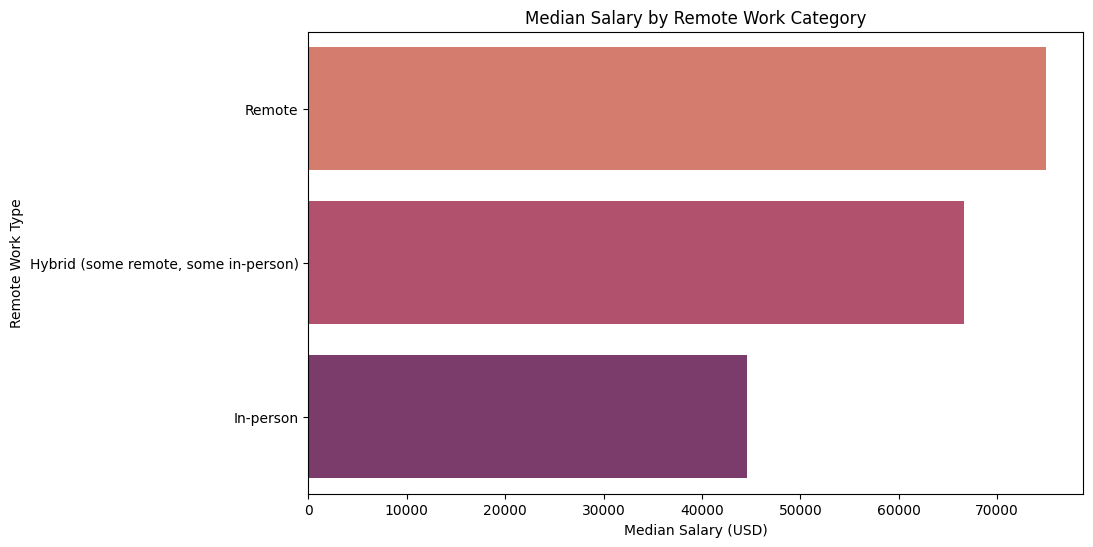

In [30]:
#Which Remote Work Category Earns the Most?
plt.figure(figsize=(10,6))
sns.barplot(x=remote_salary.values, y=remote_salary.index, palette="flare")
plt.title("Median Salary by Remote Work Category")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Remote Work Type")
plt.show()
